In [1]:
# import the necessary packages
from keras.preprocessing import image as image_utils
from imagenet_utils import decode_predictions
from imagenet_utils import preprocess_input
from keras.applications import VGG16
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

image_path = './images/soccer_ball.jpg'
    
# load the original image via OpenCV so we can display it and draw a description on it later
orig = cv2.imread(image_path)

Using TensorFlow backend.


In [2]:
# load the input image using the Keras helper utility while ensuring
# that the image is resized to 224x224 pxiels, the required input
# dimensions for the network -- then convert the PIL image to a
# NumPy array
print("loading and preprocessing image...")
image = image_utils.load_img(image_path, target_size=(224, 224))
image = image_utils.img_to_array(image)

loading and preprocessing image...


In [3]:
# our image is now represented by a NumPy array of shape (3, 224, 224),
# but we need to expand the dimensions to be (1, 3, 224, 224) so we can
# pass it through the network -- we'll also preprocess the image by
# subtracting the mean RGB pixel intensity from the ImageNet dataset
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

In [4]:
??preprocess_input

In [5]:
??decode_predictions

[INFO] loading network...
[INFO] classifying image...
ImageNet ID: n04254680, Description: soccer_ball, Probability: 0.9890294075012207


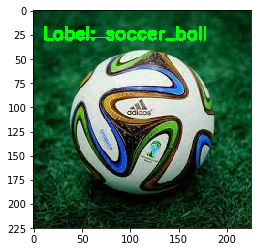

In [6]:
# load the VGG16 network
print("loading network...")
model = VGG16(weights="imagenet")
 
# classify the image
print("classifying image...")
preds = model.predict(image)

(imagenet_id,description,probability) = decode_predictions(preds)[0][0]
# display the predictions
print("ImageNet ID: {}, Description: {}, Probability: {}".format(imagenet_id, description,probability))
cv2.putText(orig, "Label: {}".format(description), (10, 30),
    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
plt.imshow(orig)

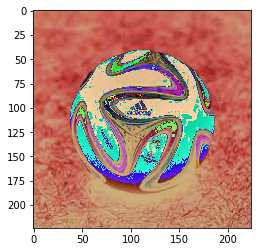

In [7]:
plt.imshow(image[0])